# **Flower Image Classifier 2.0**

In this Notebook I will train a State of the Art Densnet121 model on a dataset of flower images,<br>
save the checkpoint, load it and attempt a prediction.
<br>
Later, this checkpoint is used for an application called
<br>
"**What the Flower**" that predicts the name of the flower appearing in an ueser-provided image
<br>
<br>

**Mount Google Drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [2]:
#conda install torchvision -c soumith

import json
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from collections import OrderedDict
import os

**Data**

flowers dataset by: https://www.kaggle.com/immu0001/flowers
<br>
it is located inside my Google Drive, where the folder "flowers" is located in the exact same directory as "trainCheckpoint.ipynb".
This database can easily be downloaded from Keggle, where all files can be extracted Winzip or 7Zip.

In [3]:
#Paths to Data Directories
test_dir = "/content/drive/My Drive/Projects/wtFlower/flowers/test/"
train_dir = "/content/drive/My Drive/Projects/wtFlower/flowers/train/"
valid_dir = "/content/drive/My Drive/Projects/wtFlower/flowers/valid/"

#Data transforms
data_transforms = {
  'train': transforms.Compose([transforms.RandomResizedCrop(224),
                               transforms.RandomRotation(0,360),
                               transforms.RandomVerticalFlip(),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                           ]),
                   
  'test': transforms.Compose([transforms.Resize(255),
                              transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
                      }

# Loading datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['test']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test'])
    }

# Define Dataloaders
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=64, shuffle=True),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=64),
    'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size=32)
    }

**Load a State of the art Neural Network**

loading Vgg13 and printing its architecture

In [4]:
model = models.vgg13(pretrained=True)
input_units = model.classifier[0].in_features

model

Downloading: "https://download.pytorch.org/models/vgg13-c768596a.pth" to /root/.cache/torch/hub/checkpoints/vgg13-c768596a.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

**Set Classifier**
<br>
modifing the classifier function of the model
<br>
adjusting to 102 outputs (as the number of categories in cat_to_name)
<br>
and setting parameters hidden layers, epochs, learing rate

In [5]:
#Hyperparameters
learning_rate = 0.001
hidden_units = 512
epochs = 16

#Freeze parameters for backpropogation
for param in model.parameters():
    param.requires_grad = False

#create a new classifier function
classifier = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_units, hidden_units)),
                      ('relu', nn.ReLU()),
                      ('dropout', nn.Dropout(p=0.5)),
                      ('fc2', nn.Linear(hidden_units, 102)),
                      ('output', nn.LogSoftmax(dim=1))
                      ]))
#update classifier
model.classifier = classifier  
model 

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

In [6]:
#Training Begins
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=learning_rate)

#Define itteration variables
print_every = 10
steps = 0

In [7]:
#Validation Function
def validation(model, testloader, criterion):
    #Define validation variables
    validation_loss = 0
    validation_accuracy = 0
    #Itterare over the validation set
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        output = model.forward(images)
        validation_loss += criterion(output, labels).item()
        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        validation_accuracy += equality.type(torch.FloatTensor).mean()  
    return validation_loss, validation_accuracy

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print('GPU Enabled, training on GPU...')
else:
  device = torch.device("cpu")
  print('no GPU, training on CPU...')

model.to(device)

val_loss = []
val_accuracy = []
train_loss = []

#Start training the model
for e in range(epochs):
    model.train()
    running_loss = 0
    #Itterare over the training set
    for ii, (inputs, labels) in enumerate(dataloaders['train']):
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)        
        optimizer.zero_grad()      
        # Forward and backward passes
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    
        #Model Progress
        if steps % print_every == 0:
            #Model in evaluation
            model.eval()            
            # Turn off gradients for validation
            with torch.no_grad():
                validation_loss, validation_accuracy = validation(model, dataloaders['valid'], criterion)
            #Printing Training + Validation information    
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Validation Loss: {:.3f}.. ".format(validation_loss/len(dataloaders['valid'])),
                  "Validation Accuracy: {:.3f}".format(validation_accuracy/len(dataloaders['valid'])))  
            val_loss.append(validation_loss)
            train_loss.append(running_loss/print_every)  
            val_accuracy.append(validation_accuracy/len(dataloaders['valid']))
            running_loss = 0
        
        # Model back to training
        model.train()

GPU Enabled, training on GPU...
Epoch: 1/16..  Training Loss: 5.224..  Validation Loss: 3.824..  Validation Accuracy: 0.190
Epoch: 1/16..  Training Loss: 4.076..  Validation Loss: 3.419..  Validation Accuracy: 0.273
Epoch: 1/16..  Training Loss: 3.762..  Validation Loss: 2.879..  Validation Accuracy: 0.363
Epoch: 1/16..  Training Loss: 3.333..  Validation Loss: 2.503..  Validation Accuracy: 0.443
Epoch: 1/16..  Training Loss: 2.937..  Validation Loss: 2.077..  Validation Accuracy: 0.507
Epoch: 1/16..  Training Loss: 2.960..  Validation Loss: 1.854..  Validation Accuracy: 0.557
Epoch: 1/16..  Training Loss: 2.568..  Validation Loss: 1.584..  Validation Accuracy: 0.628
Epoch: 1/16..  Training Loss: 2.400..  Validation Loss: 1.398..  Validation Accuracy: 0.643
Epoch: 1/16..  Training Loss: 2.329..  Validation Loss: 1.304..  Validation Accuracy: 0.676
Epoch: 1/16..  Training Loss: 2.329..  Validation Loss: 1.170..  Validation Accuracy: 0.708
Epoch: 2/16..  Training Loss: 1.473..  Validatio

In [8]:
#Validation on the test set
correct = 0
total = 0
#Itterare over the test set
with torch.no_grad():
    for data in dataloaders['test']:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 77 %


# **Functions**
1. Save Checkpoint
<br>
2. Load Checkpoint
<br>
3. Predict Function

In [9]:
#Save Checkpoint
checkpoint = {'model': model,
              'state_dict': model.state_dict(),
              'class_to_idx': image_datasets['train'].class_to_idx,
              'epochs': epochs,
              'print_every': print_every,
              'val_accuracy': val_accuracy,
              'train_loss': train_loss,
              'val_loss': val_loss,
              'optimizer_state': optimizer.state_dict()}

#Load Checkpoint              
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
    model.epochs = checkpoint['epochs']
    model.print_every = checkpoint['print_every']
    model.val_accuracy = checkpoint['val_accuracy']
    model.train_loss = checkpoint['train_loss']
    model.val_loss = checkpoint['val_loss']
    model.optimizer_state = checkpoint['optimizer_state']
    return model

#Prediction Function
def predict(image_path, model, topk=3): 
    '''returns the top kk probabilities & classes for given image based on user input & model architecture'''
    image_tensor = torch.from_numpy(image_path)
    image_tensor = np.transpose(image_tensor, (2,0,1))
    image_tensor.unsqueeze_(0)
    image_tensor = image_tensor.to(device)
    with torch.no_grad():
        output = model.double().forward(image_tensor)
    #receive probabilities as 0 - 1 floats with exp
    ps = torch.exp(output)
    topk_combined = ps.topk(top_k, sorted=True)
    #top kk probabilities
    topk_ps = topk_combined[0][0]
    #top kk classes
    topk_cs = topk_combined[1][0]
    return topk_ps, topk_cs  

**Save Checkpoint**

In [12]:
torch.save(checkpoint, os.path.join('/content/drive/My Drive/Projects/wtFlower/','checkpoint1.pth'))

# **Prediction**
Load Checkpoint, load name to index mapping, plot loss, make a prediction on a demo image never seen before by the network

In [13]:
#Loading trained model for prediction
model = load_checkpoint('/content/drive/My Drive/Projects/wtFlower/checkpoint1.pth')

#Category to name user argument defaults to 'cat_to_name.json'
json_file = '/content/drive/My Drive/Projects/wtFlower/cat_to_name.json'
with open(json_file, 'r') as f:
    cat_to_name = json.load(f)

**Plot Training Loss vs Validation Loss**
<br>
to ensure the model doesn't overfilt

N loss values 164 164


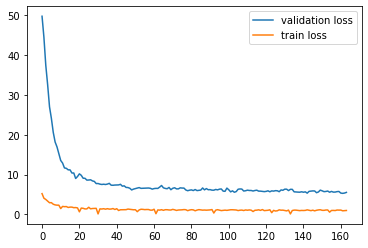

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

d = {'validation loss': model.val_loss, 'train loss': model.train_loss}
data = pd.DataFrame(data=d)

data.plot(kind='line')
print('N loss values', len(model.train_loss), len(model.val_loss))

In [16]:
import numpy as np
from PIL import Image

top_k=3

def process_image(image):
    '''takes in a PIL Image & transforms it to allow a forward pass'''
    image = image.resize((256,256))
    image = image.crop((0,0,224,224))
    np_image = np.array(image)
    np_image = np_image / 255
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    pil_image = (np_image - mean) / std
    return pil_image

#Define PIL image & run it with process_image() to get predictions
image = Image.open('/content/drive/My Drive/Projects/wtFlower/test_me.jpg')
processed_img = process_image(image)    

#Creating a Dataframe that contains Labels & Indices of Classes (df_combined)
pd_class_to_idx = pd.Series(model.class_to_idx)
pd_cat_to_name = pd.Series(cat_to_name)

#choosing column indices
columns = {'Index' : pd_class_to_idx,
            'Label': pd_cat_to_name}

#combining series to one dataframe
df_combined = pd.DataFrame(columns)

#Predicting top kk with predict()
topk_ps, topk_cs = predict(processed_img, model)

#itterating trough the top kk classes & translating it to legible strings from df_combined
comb_classes = []

for i in topk_cs:
    comb_class = df_combined.values[i]
    comb_classes.append(comb_class)

flower_name = comb_classes[0][1]
#class_probability = np.linalg.norm(topk_ps[0])

print('flower name:', flower_name)


flower name: rose
